# A template to go through the regular data and modelling.

## Dependencies

In [1]:
#general 
import pandas as pd
import numpy as np

In [3]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_recall_curve, roc_auc_score, roc_curve

In [6]:
#data processing for numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Encoders for categoriacl features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

In [9]:
# handle keywrods, text
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# reduce dimensions
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import UMAP

In [13]:
#model selection
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

In [15]:
#classical models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

# 1  Data Collection and Preparation

In [18]:
data = pd.read_csv('.\custom_churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.1 Check duplicates and missing data

In [23]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
#Check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
#Another way to check
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
#Check duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [31]:
#If there is duplicate rows, use this to identify 
#duplicate_rows = df[df.duplicated()]

In [33]:
#drop duplicates
#data_unique = data.drop_duplicates()

## 1.2  Identify the target variable and how you would collect and label it if necessary

In [37]:
data.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

In [39]:
# Binary classification

In [41]:
data['Target'] = data['Churn'].apply(lambda x: 0 if x =='No' else 1)

## 1.3 discuss possible features if featuers are not provided

## 1.4 Check the balance of the data
If the dataset is imbalance, possible solutions:

For data 

(1) Oversampling, use KNN, SMOTE to get more data samples for the minority class

(2) Undersampling, reduce the number of the majority class

(3) Other data augmentation methods: image rotation, crop, flip, add noise, ...

For model:
Adjust the weights of the loss function

## 1.5 Check possible highly correlated features

In [46]:
data.loc[data['TotalCharges']==' ','TotalCharges'] = '0'

In [48]:
data['TotalCharges'] =  data['TotalCharges'].astype('float')

In [50]:
data.corr(method = 'pearson')                                                                                                        

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Target
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324
Target,0.150889,-0.352229,0.193356,-0.198324,1.000000


In [52]:
# Here tenure and TotalCharges are highly correlated because TotalCharges = tenure * MonthlyCharges

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2 Feature engineering

### 2.1 Selecting features
(1) Include all possible data, build a tree model and get the feature importance

(2) Use permutation_importance

(3) Use shap value

(4) Check distribution and see if there is any signal there

In [58]:
from sklearn.inspection import permutation_importance # need to be combined with a model
#clf = xgb(...)
#clf.feature_importances_
import shap # need to be combined with models

#### Check distribution
#Before we build any models, we can simply look into the distributions to see if any signal is included in the feature.
#For numerical features, we can check the histogram, for categorical features, we can count the frequencies under different targets

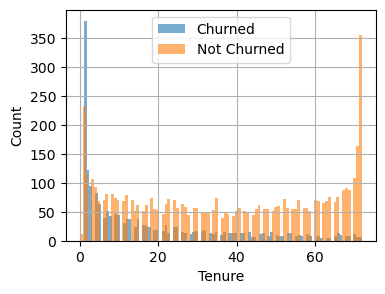

In [61]:
plt.figure(figsize=(4,3))
cc = plt.hist(data.loc[data['Target']==1,'tenure'].values, bins = 100, label = 'Churned', alpha = 0.6)
cc = plt.hist(data.loc[data['Target']==0,'tenure'].values, bins = 100, label = 'Not Churned', alpha =0.6)
plt.grid()
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend()
plt.show()

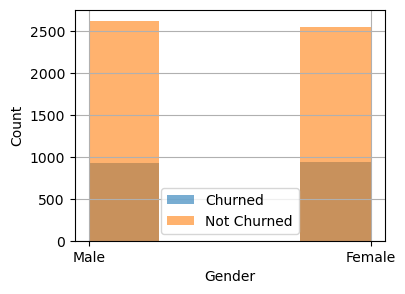

In [63]:
plt.figure(figsize=(4,3))
cc = plt.hist(data.loc[data['Target']==1,'gender'].values, bins = 4, label = 'Churned', alpha = 0.6)
cc = plt.hist(data.loc[data['Target']==0,'gender'].values, bins = 4, label = 'Not Churned', alpha =0.6)
plt.grid()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

### 2.2 Feature representation
#For categorical/text features, find the proper way to do embedding if the model cannot take categorical features directly

#For numerical features, remove outliers, normalize the data if necessary

#If too many features, consider dimension reduction

### OnehotEncoder categorical features

In [67]:
selected_categorical = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',\
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',\
                       'PaymentMethod']

In [69]:
selected_numerical = ['tenure', 'MonthlyCharges']

In [71]:
enc = OneHotEncoder(handle_unknown='error', drop='first')

In [73]:
feature_encoded = enc.fit_transform(data[selected_categorical])

In [75]:
feature_encoded.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
enc.get_feature_names_out()

array(['SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [79]:
data_encoded = pd.DataFrame(data = feature_encoded.toarray(), columns = enc.get_feature_names_out())

In [81]:
data_encoded.head()

,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [83]:
data_encoded = pd.concat([data[selected_numerical], data_encoded], axis =1)

In [85]:
data_encoded.head()

,tenure,MonthlyCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Numerical features processing
Check distribution, identify outliers, normalization

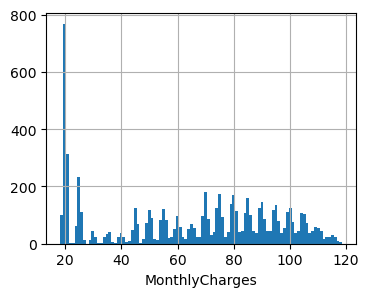

In [89]:
plt.figure(figsize=(4,3))
cc = plt.hist(data_encoded['MonthlyCharges'], bins = 100)
plt.grid()
plt.xlabel('MonthlyCharges')
plt.show()

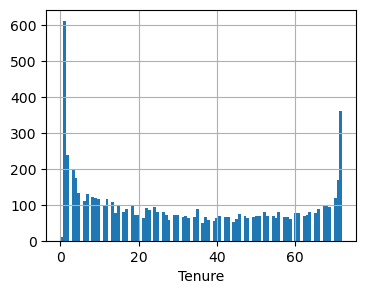

In [91]:
plt.figure(figsize=(4,3))
cc = plt.hist(data_encoded['tenure'], bins = 100)
plt.grid()
plt.xlabel('Tenure')
plt.show()

In [93]:
#Check outliers
p25, p75 = np.percentile(data_encoded['tenure'].values, (25, 75))

In [95]:
IQR = p75 - p25
upper_fence = p75+1.5*IQR
lower_fence = p25-1.5*IQR

In [97]:
upper_fence, lower_fence

(124.0, -60.0)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['Target'].values, test_size = 0.3, shuffle=True, random_state=42 )

In [101]:
#Normalize the data
#If the data has a long tail, convert to log, and then normalize
#To avoid data being screwed by outliers, use RobustScaler
#StandardScaler, removing the mean and scaling to unit variance

In [103]:
scaler = StandardScaler()

In [105]:
data_normalized = scaler.fit_transform(X_train[selected_numerical])

In [107]:
X_train_normalized = X_train.copy()
X_train_normalized['tenure'] = data_normalized[:,0]
X_train_normalized['MonthlyCharges'] = data_normalized[:,1]

In [109]:
data_normalized_test = scaler.transform(X_test[selected_numerical])

In [111]:
X_test_normalized = X_test.copy()
X_test_normalized['tenure'] = data_normalized_test[:,0]
X_test_normalized['MonthlyCharges'] = data_normalized_test[:,1]

# 3 Select models

Explain why select this model, pros and cons

# 4 Model training and testing

## 4.1 Baseline

In [117]:
# Randomly results, or always give the majority calss

In [119]:
predict = np.zeros_like(y_test) #most clidents don't churn

In [121]:
accuracy_score(y_test, predict)

0.7283483199242783

## 4.2 Logistic regression

In [124]:
clf1 = LogisticRegression(C = 1.0, class_weight='balanced', random_state = 42)

In [126]:
clf1.fit(X_train_normalized.values, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [128]:
y_train_predict = clf1.predict(X_train_normalized.values)

In [130]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      3635
           1       0.51      0.79      0.62      1295

    accuracy                           0.74      4930
   macro avg       0.71      0.76      0.71      4930
weighted avg       0.80      0.74      0.76      4930



In [132]:
confusion_matrix(y_train, y_train_predict)

array([[2634, 1001],
       [ 266, 1029]], dtype=int64)

### logistic regression Tune parameters

In [135]:
model = LogisticRegression(class_weight = 'balanced')

In [137]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats= 10, random_state = 42)

In [139]:
# define search space
space = dict()
space['C'] = [0.1,0.3,0.5,0.7,1]

In [141]:
search = GridSearchCV(model, space, scoring = 'f1', n_jobs=-1, cv = cv)

In [143]:
result = search.fit(X_train_normalized.values, y_train)

In [144]:
result.cv_results_

{'mean_fit_time': array([0.01451962, 0.01825741, 0.0173493 , 0.03008224, 0.02260656]),
 'std_fit_time': array([0.01073428, 0.01546636, 0.01291835, 0.03116438, 0.01860455]),
 'mean_score_time': array([0.00074274, 0.00147245, 0.00090214, 0.00089711, 0.00095064]),
 'std_score_time': array([0.00085249, 0.00594468, 0.00090158, 0.00085728, 0.00078334]),
 'param_C': masked_array(data=[0.1, 0.3, 0.5, 0.7, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 0.3}, {'C': 0.5}, {'C': 0.7}, {'C': 1}],
 'split0_test_score': array([0.60471976, 0.60526316, 0.60410557, 0.60322108, 0.60410557]),
 'split1_test_score': array([0.64110429, 0.64133739, 0.64036419, 0.63939394, 0.63650075]),
 'split2_test_score': array([0.59459459, 0.59670165, 0.59670165, 0.59670165, 0.5975976 ]),
 'split3_test_score': array([0.61933535, 0.61445783, 0.61746988, 0.61840121, 0.61840121]),
 'split4_test_score': array([0.63190184, 0.63093415,

In [145]:
result.best_score_

0.614347918391214

In [146]:
result.best_params_

{'C': 0.1}

In [151]:
clf1 = LogisticRegression(C = 0.1, class_weight='balanced', random_state = 42)

In [153]:
clf1.fit(X_train_normalized.values, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42)

In [155]:
y_train_predict = clf1.predict(X_train_normalized.values)

In [157]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3635
           1       0.51      0.79      0.62      1295

    accuracy                           0.74      4930
   macro avg       0.71      0.76      0.71      4930
weighted avg       0.80      0.74      0.76      4930



In [159]:
y_test_predict = clf1.predict(X_test_normalized.values)

In [161]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1539
           1       0.54      0.82      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.81      0.76      0.77      2113



## 4.3 xgboost

In [164]:
(len(data) - data['Target'].sum())/data['Target'].sum()

2.7683253076511503

In [166]:
clf_xgb = xgb.XGBClassifier(n_estimators=50, max_depth = 7, scale_pos_weight = 2.8)

In [168]:
clf_xgb.fit(X_train_normalized.values, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [170]:
y_train_pred = clf_xgb.predict(X_train_normalized)

In [172]:
y_train_pred_score = clf_xgb.predict_proba(X_train_normalized)

In [174]:
y_train_pred_score

array([[0.9809517 , 0.01904828],
       [0.11333144, 0.88666856],
       [0.99610007, 0.00389994],
       ...,
       [0.7196251 , 0.28037485],
       [0.0242064 , 0.9757936 ],
       [0.98076737, 0.0192326 ]], dtype=float32)

In [176]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3635
           1       0.74      0.98      0.84      1295

    accuracy                           0.90      4930
   macro avg       0.87      0.93      0.89      4930
weighted avg       0.93      0.90      0.91      4930



In [178]:
cm = confusion_matrix(y_train, y_train_pred)

In [180]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)

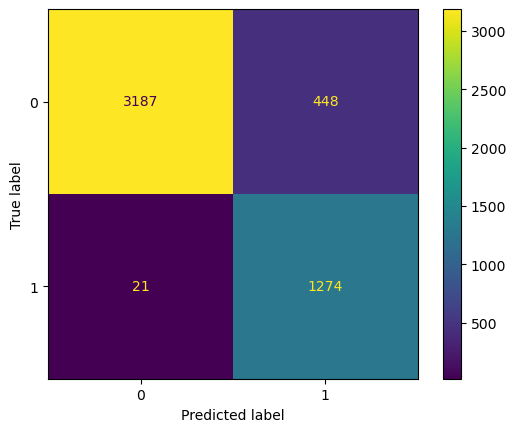

In [182]:
disp.plot()
plt.show()

### xgboost--Tune parameters

In [185]:
model = xgb.XGBClassifier()

In [187]:
#define search space
space = dict()
space['n_estimators'] = [10, 20, 30, 50, 100]
space['max_depth'] = [3,5,7]
space['scale_pos_weight'] = [1.0, 1.5, 2, 2.8]

In [189]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=10, random_state = 42,)

In [199]:
search = GridSearchCV(model, space, scoring = 'f1', cv = cv, n_jobs=8, verbose = 2)

In [204]:
results = search.fit(X_train_normalized.values, y_train)

Fitting 100 folds for each of 60 candidates, totalling 6000 fits


In [206]:
results.best_score_

0.6224550846419963

In [210]:
results.best_params_

{'max_depth': 3, 'n_estimators': 10, 'scale_pos_weight': 2}

In [216]:
#Train with the best parameter set
model = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, scale_pos_weight = 2)

In [218]:
model.fit(X_train_normalized.values, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [220]:
y_train_pred = model.predict(X_train_normalized)

In [222]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3635
           1       0.56      0.74      0.64      1295

    accuracy                           0.78      4930
   macro avg       0.73      0.77      0.74      4930
weighted avg       0.81      0.78      0.79      4930



In [224]:
y_test_pred = model.predict(X_test_normalized.values)

In [228]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1539
           1       0.58      0.75      0.66       574

    accuracy                           0.79      2113
   macro avg       0.74      0.78      0.75      2113
weighted avg       0.81      0.79      0.79      2113



In [230]:
cm  =  confusion_matrix(y_test, y_test_pred)

In [242]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

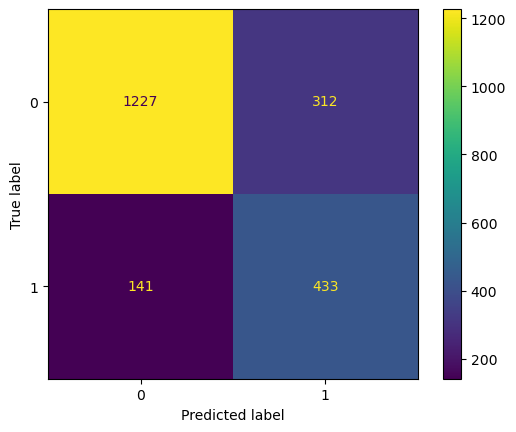

In [246]:
disp.plot()
plt.show()

In [250]:
y_test_pred_score = model.predict_proba(X_test_normalized)[:,1]

In [276]:
len(precision), len(thresholds)

(609, 608)

In [258]:
#plot AUC
precision, recall, thresholds  = precision_recall_curve(y_test, y_test_pred_score)

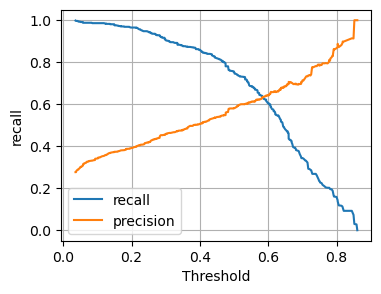

In [292]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, recall[1:], label='recall')
plt.plot(thresholds, precision[1:], label='precision')
plt.xlabel('Threshold')
plt.ylabel('recall')
plt.legend()
plt.grid()
plt.show()

In [298]:
roc_auc_score(y_test, y_test_pred_score)

0.8527121779154301

In [304]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_score)

In [308]:
len(fpr), len(thresholds)

(489, 489)

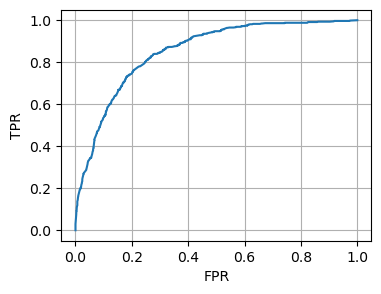

In [310]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
#check the feature importance

In [320]:
model.feature_importances_

array([0.07823536, 0.01253699, 0.01798234, 0.        , 0.        ,
       0.01153788, 0.        , 0.        , 0.10119394, 0.11688905,
       0.        , 0.04825658, 0.        , 0.00419265, 0.        ,
       0.00897819, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04904345, 0.23162535, 0.23243442, 0.01700579,
       0.        , 0.07008792, 0.        ], dtype=float32)

In [322]:
X_train_normalized.columns

Index(['tenure', 'MonthlyCharges', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [326]:
imp = {i:j for i, j in zip(X_train_normalized.columns, model.feature_importances_)}

In [341]:
sorted(imp.items(), key=lambda item: item[1], reverse = True)

[('Contract_Two year', 0.23243442),
 ('Contract_One year', 0.23162535),
 ('InternetService_No', 0.11688905),
 ('InternetService_Fiber optic', 0.10119394),
 ('tenure', 0.07823536),
 ('PaymentMethod_Electronic check', 0.070087925),
 ('StreamingMovies_Yes', 0.04904345),
 ('OnlineSecurity_Yes', 0.048256584),
 ('SeniorCitizen_1', 0.017982343),
 ('PaperlessBilling_Yes', 0.017005792),
 ('MonthlyCharges', 0.012536986),
 ('PhoneService_Yes', 0.011537877),
 ('DeviceProtection_Yes', 0.008978187),
 ('OnlineBackup_Yes', 0.004192651),
 ('Partner_Yes', 0.0),
 ('Dependents_Yes', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_No internet service', 0.0),
 ('PaymentMethod_Credit card

In [345]:
feature_importance = pd.DataFrame()
feature_importance['FeatureName'] = X_train_normalized.columns
feature_importance['Score'] = model.feature_importances_

In [347]:
feature_importance.sort_values(by = 'Score', ascending=False)

,FeatureName,Score
23,Contract_Two year,0.232434
22,Contract_One year,0.231625
9,InternetService_No,0.116889
8,InternetService_Fiber optic,0.101194
0,tenure,0.078235
26,PaymentMethod_Electronic check,0.070088
21,StreamingMovies_Yes,0.049043
11,OnlineSecurity_Yes,0.048257
2,SeniorCitizen_1,0.017982
24,PaperlessBilling_Yes,0.017006


## 4.4 Neural Network

In [376]:
X_train_normalized.shape

(4930, 28)

In [349]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

In [395]:
from keras.layers import Dense, ReLU, BatchNormalization, Dropout, Input
from keras.models import Sequential, Model

In [397]:
K.clear_session()

In [ ]:
kernel_initializer

In [430]:
kernel_initializer = keras.initializers.GlorotUniform(seed = 42)
inputs = Input(shape = (28,) )
x = Dense(32, kernel_initializer = kernel_initializer)(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32, kernel_initializer = kernel_initializer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32, kernel_initializer = kernel_initializer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

outputs = Dense(1, kernel_initializer = kernal_initializer, activation = 'sigmoid')(x)
NN_model = Model(inputs = inputs, outputs = outputs)

In [432]:
NN_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                928       
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                           

In [434]:
NN_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
metrics = ['Accuracy', 'Precision', 'Recall'])

In [441]:
epochs = 10
batch_size = 8
history = NN_model.fit(X_train_normalized.values, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2)

Epoch 1/10
493/493 [==============================] - 2s 4ms/step - loss: 0.4380 - Accuracy: 0.7928 - precision: 0.6506 - recall: 0.4858 - val_loss: 0.4077 - val_Accuracy: 0.8063 - val_precision: 0.6168 - val_recall: 0.5477
Epoch 2/10
493/493 [==============================] - 2s 3ms/step - loss: 0.4376 - Accuracy: 0.7926 - precision: 0.6540 - recall: 0.4753 - val_loss: 0.4014 - val_Accuracy: 0.8073 - val_precision: 0.6209 - val_recall: 0.5436
Epoch 3/10
493/493 [==============================] - 2s 3ms/step - loss: 0.4362 - Accuracy: 0.7964 - precision: 0.6579 - recall: 0.4962 - val_loss: 0.4086 - val_Accuracy: 0.8032 - val_precision: 0.6205 - val_recall: 0.5021
Epoch 4/10
493/493 [==============================] - 2s 4ms/step - loss: 0.4358 - Accuracy: 0.7883 - precision: 0.6367 - recall: 0.4839 - val_loss: 0.4083 - val_Accuracy: 0.8073 - val_precision: 0.6308 - val_recall: 0.5104
Epoch 5/10
493/493 [==============================] - 2s 3ms/step - loss: 0.4319 - Accuracy: 0.7941 - pr

In [456]:
batch_size = 8
y_test_pred_score = NN_model.predict(X_test_normalized, batch_size = batch_size)

In [457]:
y_test_pred_score.flatten()

array([0.57629895, 0.12807375, 0.01842904, ..., 0.01846659, 0.4162434 ,
       0.23001385], dtype=float32)

In [469]:
y_test_pred = (y_test_pred_score>=0.5).astype('int')

In [473]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.70      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## Ensemble model